# Figure 4: The Effect of Time-Averaging and the Sadler Effect on Haar Fluctuations

Note: Make sure to change import and save directories to correct locations. The required data for plotting is stored in: blind_review_venv/data

In [ ]:
# Set User Paths #
src_path = "./Blind_Review_Code_Repository_2025/src/"

In [2]:
# Library Imports
import os
os.chdir(src_path)

# From src
## UNTB Functions
import untbPython
## Diversity Metric Functions
import analysisFunctions 
import divDynFunctions
import samplingFunctions
import diversityMetrics
## Haar Fluctuation Analysis Functions
import haarFluctuationAnalysis
import crossHaarCorrelation

# Other Imports
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numba import set_num_threads # Set number of threads for computations
import matplotlib
import scipy

## Species-level Model Results

- Run for 25000 time steps (will truncate)
- Speciation probability = extinction probability = 0.05

In [ ]:
src_path = "./Blind_Review_Code_Repository_2025/"
os.chdir(src_path)

In [5]:
# Load Ideal Case
unrich_path = "./data/Fig4_RW_Data/Ideal_Case_RW_Dep_Cut.npz"
loaded = np.load(unrich_path, allow_pickle=True)
ideal_data = loaded['arr_0'].item()

In [6]:
# Load ideal data
org2f3_ideal_rw = ideal_data["org2f3"]
ext2f3_ideal_rw = ideal_data["ext2f3"]
divRT_ideal_rw = ideal_data["divRT"]
mid_point_times_rw = ideal_data["mid_point_times"]
time_v_rw = ideal_data["time_an"]
haar_Div_ideal_rw = ideal_data["haar_Div"]
haar_oriRT_ideal_rw = ideal_data["haar_oriRT"]
haar_extRT_ideal_rw = ideal_data["haar_extRT"]
corr_org_ext_ideal_rw = ideal_data["corr_org_ext"]
corr_org_div_ideal_rw = ideal_data["corr_org_div"]
corr_ext_div_ideal_rw = ideal_data["corr_ext_div"]

### Plot Species-level Results

In [ ]:
# Set Tiff Save Path
tiff_save_path = "./Fig4_RW.tiff"

# Note that background is set to transparent for the output

In [8]:
# Load Ideal Case
base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff100_dep10.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC100_D10 = loaded['arr_0']

base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff100_dep100.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC100_D100 = loaded['arr_0']

base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff100_dep1000.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC100_D1000 = loaded['arr_0']

base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff1000_dep10.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC1000_D10 = loaded['arr_0']

base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff1000_dep100.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC1000_D100 = loaded['arr_0']

base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff1000_dep1000.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC1000_D1000 = loaded['arr_0']

base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff10000_dep10.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC10000_D10 = loaded['arr_0']

base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff10000_dep100.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC10000_D100 = loaded['arr_0']

base_path = "./data/Fig4_RW_Data/RW_Dep_Cut/RW_cutoff10000_dep1000.npz"
loaded = np.load(base_path, allow_pickle=True)
RWC10000_D1000 = loaded['arr_0']

In [9]:
# Data Groupings
RW_C100 = [RWC100_D10, RWC100_D100, RWC100_D1000]
RW_C1000 = [RWC1000_D10, RWC1000_D100, RWC1000_D1000]
RW_C10000 = [RWC10000_D10, RWC10000_D100, RWC10000_D1000]

/var/folders/sf/p2mch0653zx3lw4wc3nn14hw0000gp/T/ipykernel_71201/3782870673.py:12: RuntimeWarning: divide by zero encountered in log10
  axs[g,1].plot(np.log10(x), np.log10(haar_Div_ideal_rw[:,1]), c = "black", linestyle = "dashed",alpha = 1, linewidth = 1)
/var/folders/sf/p2mch0653zx3lw4wc3nn14hw0000gp/T/ipykernel_71201/3782870673.py:13: RuntimeWarning: divide by zero encountered in log10
  axs[g,2].plot(np.log10(x), np.log10(haar_oriRT_ideal_rw[:,1]), c = "blue", linestyle = "dashed",alpha = 1, linewidth = 1)
/var/folders/sf/p2mch0653zx3lw4wc3nn14hw0000gp/T/ipykernel_71201/3782870673.py:14: RuntimeWarning: divide by zero encountered in log10
  axs[g,2].plot(np.log10(x), np.log10(haar_extRT_ideal_rw[:,1]), c = "green", linestyle = "dashed",alpha = 1, linewidth = 1)
/Users/wyatt.petryshen/Library/CloudStorage/GoogleDrive-wyatt.petryshen@yale.edu/My Drive/Haar UNTB Project/Haar_Publication_Folder/Blind_Review_Code_Repository_2025/src/analysisFunctions.py:171: RuntimeWarning: Mean of emp

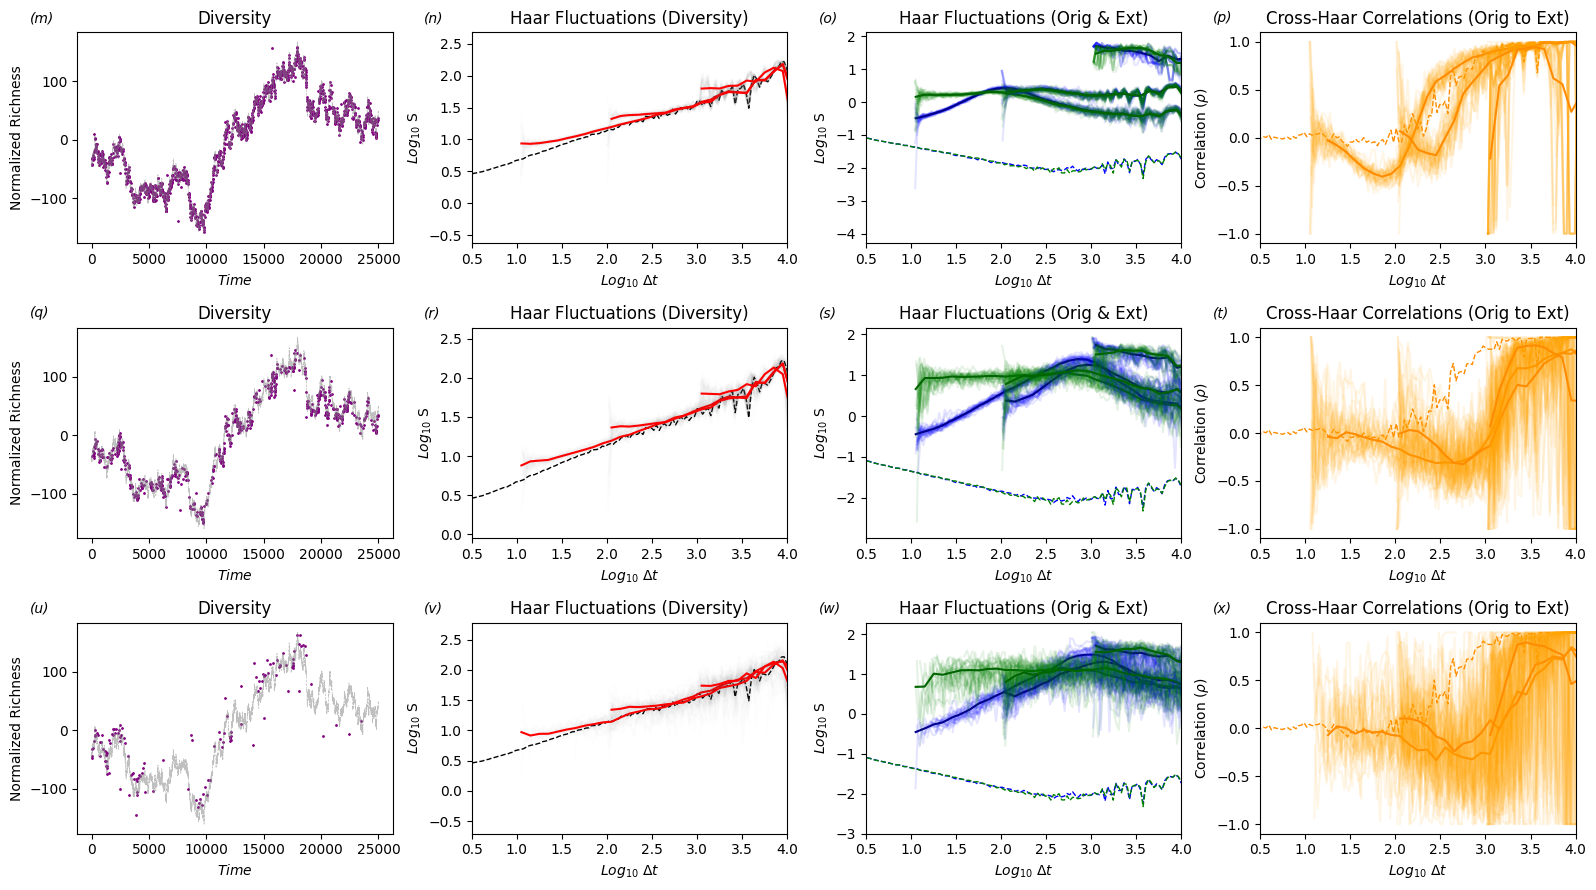

In [10]:
# Plot
fig, axs = plt.subplots(3, 4,  figsize=(16, 9))

group_rw = [RW_C100, RW_C1000, RW_C10000]

for g, grouping in enumerate(group_rw):
    row_idx = g

    # Plot Ideals
    x = haar_Div_ideal_rw[:,0]
    axs[g,0].plot(range(len(divRT_ideal_rw[0:25000])), divRT_ideal_rw[0:25000] - np.mean(divRT_ideal_rw[0:25000]), c = "grey", linestyle = "dashed",alpha = 0.5, linewidth = 0.5)
    axs[g,1].plot(np.log10(x), np.log10(haar_Div_ideal_rw[:,1]), c = "black", linestyle = "dashed",alpha = 1, linewidth = 1)
    axs[g,2].plot(np.log10(x), np.log10(haar_oriRT_ideal_rw[:,1]), c = "blue", linestyle = "dashed",alpha = 1, linewidth = 1)
    axs[g,2].plot(np.log10(x), np.log10(haar_extRT_ideal_rw[:,1]), c = "green", linestyle = "dashed",alpha = 1, linewidth = 1)
    axs[g,3].plot(np.log10(x), (corr_org_ext_ideal_rw), c = "darkorange", linestyle = "dashed",alpha = 1, linewidth = 1)


    for data in grouping:

        # Diversity
        #for i in range(len(data)):
        for i in range(1):
            x = data[i]["time_an"]
            y = data[i]["divRT"]
            axs[row_idx,0].scatter(x , y - np.mean(y), c = "purple", alpha = 1, s = 1)


        # Haar Diversity
        harr_list = []
        time_list = []
        for i in range(len(data)):
            x = data[i]["haar_Div"][:,0]
            y = data[i]["haar_Div"][:,1]
            time_list.append(x)
            harr_list.append(y)
            axs[row_idx,1].plot(np.log10(x), np.log10(y), c = "grey", alpha = 0.01)

        haar_div_mean, haar_div_std, haarDiv_mean_time = analysisFunctions.mean_std_uneven(
            harr_list, time_list, bin_edges=10**np.arange(0.1, 4.5, 0.1))
        axs[row_idx,1].plot(np.log10(haarDiv_mean_time), np.log10(haar_div_mean), c = "red", alpha = 1)

        # Haar Origination
        harr_list = []
        time_list = []
        for i in range(len(data)):
            x = data[i]["haar_oriRT"][:,0]
            y = data[i]["haar_oriRT"][:,1]
            time_list.append(x)
            harr_list.append(y)
            axs[row_idx,2].plot(np.log10(x), np.log10(y), c = "blue", alpha = 0.1)

        haar_div_mean, haar_div_std, haarDiv_mean_time = analysisFunctions.mean_std_uneven(
            harr_list, time_list, bin_edges=10**np.arange(0.1, 4.5, 0.1))
        axs[row_idx,2].plot(np.log10(haarDiv_mean_time), np.log10(haar_div_mean), c = "darkblue", alpha = 1)

        # Haar Extinction (plotted on same as Origination?)
        harr_list = []
        time_list = []
        for i in range(len(data)):
            x = data[i]["haar_extRT"][:,0]
            y = data[i]["haar_extRT"][:,1]
            time_list.append(x)
            harr_list.append(y)
            axs[row_idx,2].plot(np.log10(x), np.log10(y), c = "green", alpha = 0.1)

        haar_div_mean, haar_div_std, haarDiv_mean_time = analysisFunctions.mean_std_uneven(
            harr_list, time_list, bin_edges=10**np.arange(0.1, 4.5, 0.1))
        axs[row_idx,2].plot(np.log10(haarDiv_mean_time), np.log10(haar_div_mean), c = "darkgreen", alpha = 1)

        # Correlations
        harr_list = []
        time_list = []
        for i in range(len(data)):
            x = data[i]["haar_extRT"][:,0]
            y = data[i]["corr_org_ext"]
            time_list.append(x)
            harr_list.append(y)
            axs[row_idx,3].plot(np.log10(x), y, c = "orange", alpha = 0.1)

        haar_div_mean, haar_div_std, haarDiv_mean_time = analysisFunctions.mean_std_uneven(
            harr_list, time_list, bin_edges=10**np.arange(1.2, 4.5, 0.1))
        axs[row_idx,3].plot(np.log10(haarDiv_mean_time), haar_div_mean, c = "darkorange", alpha = 1)

    # Optional: Add titles or labels
    axs[row_idx,0].set_title("Diversity")
    axs[row_idx,1].set_title("Haar Fluctuations (Diversity)")
    axs[row_idx,2].set_title("Haar Fluctuations (Orig & Ext)")
    axs[row_idx,3].set_title("Cross-Haar Correlations (Orig to Ext)")


    axs[row_idx,0].set_xlabel(r'$Time$')
    axs[row_idx,0].set_ylabel(r'Normalized Richness')
    axs[row_idx,1].set_xlabel(r'$Log_{10}$ $\Delta t$')
    axs[row_idx,1].set_ylabel(r'$Log_{10}$ S')
    axs[row_idx,2].set_xlabel(r'$Log_{10}$ $\Delta t$')
    axs[row_idx,2].set_ylabel(r'$Log_{10}$ S')
    axs[row_idx,3].set_xlabel(r'$Log_{10}$ $\Delta t$')
    axs[row_idx,3].set_ylabel(r'Correlation $(\rho)$')

    axs[row_idx,1].set_xlim(0.5, 4)
    axs[row_idx,2].set_xlim(0.5, 4)
    axs[row_idx,3].set_xlim(0.5, 4)

subplot_letters = [
"(m)", "(n)","(o)", "(p)",
"(q)", "(r)","(s)", "(t)",
"(u)", "(v)","(w)", "(x)"
]
# Plot Letters
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        idx = i * 4 + j
        ax.text(-0.15, 1.1, subplot_letters[idx], transform=ax.transAxes,
            fontsize=10, fontstyle='italic', va='top', ha='left')


plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.4)

plt.savefig(tiff_save_path, format='tiff', dpi=300, bbox_inches='tight',transparent=True)

### Plot for UNTB Results

In [ ]:
# Set Tiff Save Path 
tiff_save_path = "./Fig4_UNTB.tiff"


In [12]:
# Load Ideal Case
unrich_path = "./data/Fig4_UNTB_Data/Ideal_Case_UNTB_Dep_Cut.npz"
loaded = np.load(unrich_path, allow_pickle=True)
ideal_data = loaded['arr_0'].item()

In [13]:
# Load ideal data
org2f3_ideal = ideal_data["org2f3"]
ext2f3_ideal = ideal_data["ext2f3"]
divRT_ideal = ideal_data["divRT"]
mid_point_times = ideal_data["mid_point_times"]
time_v = ideal_data["time_an"]
haar_Div_ideal = ideal_data["haar_Div"]
haar_oriRT_ideal = ideal_data["haar_oriRT"]
haar_extRT_ideal = ideal_data["haar_extRT"]
corr_org_ext_ideal = ideal_data["corr_org_ext"]
corr_org_div_ideal = ideal_data["corr_org_div"]
corr_ext_div_ideal = ideal_data["corr_ext_div"]

In [14]:
# Load Ideal Case
base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff100_dep10.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC100_D10 = loaded['arr_0']

base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff100_dep100.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC100_D100 = loaded['arr_0']

base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff100_dep1000.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC100_D1000 = loaded['arr_0']

base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff1000_dep10.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC1000_D10 = loaded['arr_0']

base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff1000_dep100.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC1000_D100 = loaded['arr_0']

base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff1000_dep1000.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC1000_D1000 = loaded['arr_0']

base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff10000_dep10.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC10000_D10 = loaded['arr_0']

base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff10000_dep100.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC10000_D100 = loaded['arr_0']

base_path = "./data/Fig4_UNTB_Data/UNTB_Dep_Cut/UNTB_cutoff10000_dep1000.npz"
loaded = np.load(base_path, allow_pickle=True)
UNTBC10000_D1000 = loaded['arr_0']

In [15]:
# Data Groupings
UNTB_C100 = [UNTBC100_D10, UNTBC100_D100, UNTBC100_D1000]
UNTB_C1000 = [UNTBC1000_D10, UNTBC1000_D100, UNTBC1000_D1000]
UNTB_C10000 = [UNTBC10000_D10, UNTBC10000_D100, UNTBC10000_D1000]

/var/folders/sf/p2mch0653zx3lw4wc3nn14hw0000gp/T/ipykernel_71201/418810150.py:12: RuntimeWarning: divide by zero encountered in log10
  axs[g,1].plot(np.log10(x), np.log10(haar_Div_ideal[:,1]), c = "black", linestyle = "dashed",alpha = 1, linewidth = 1)
/var/folders/sf/p2mch0653zx3lw4wc3nn14hw0000gp/T/ipykernel_71201/418810150.py:13: RuntimeWarning: divide by zero encountered in log10
  axs[g,2].plot(np.log10(x), np.log10(haar_oriRT_ideal[:,1]), c = "blue", linestyle = "dashed",alpha = 1, linewidth = 1)
/var/folders/sf/p2mch0653zx3lw4wc3nn14hw0000gp/T/ipykernel_71201/418810150.py:14: RuntimeWarning: divide by zero encountered in log10
  axs[g,2].plot(np.log10(x), np.log10(haar_extRT_ideal[:,1]), c = "green", linestyle = "dashed",alpha = 1, linewidth = 1)
/var/folders/sf/p2mch0653zx3lw4wc3nn14hw0000gp/T/ipykernel_71201/418810150.py:36: RuntimeWarning: divide by zero encountered in log10
  axs[row_idx,1].plot(np.log10(x), np.log10(y), c = "grey", alpha = 0.01)


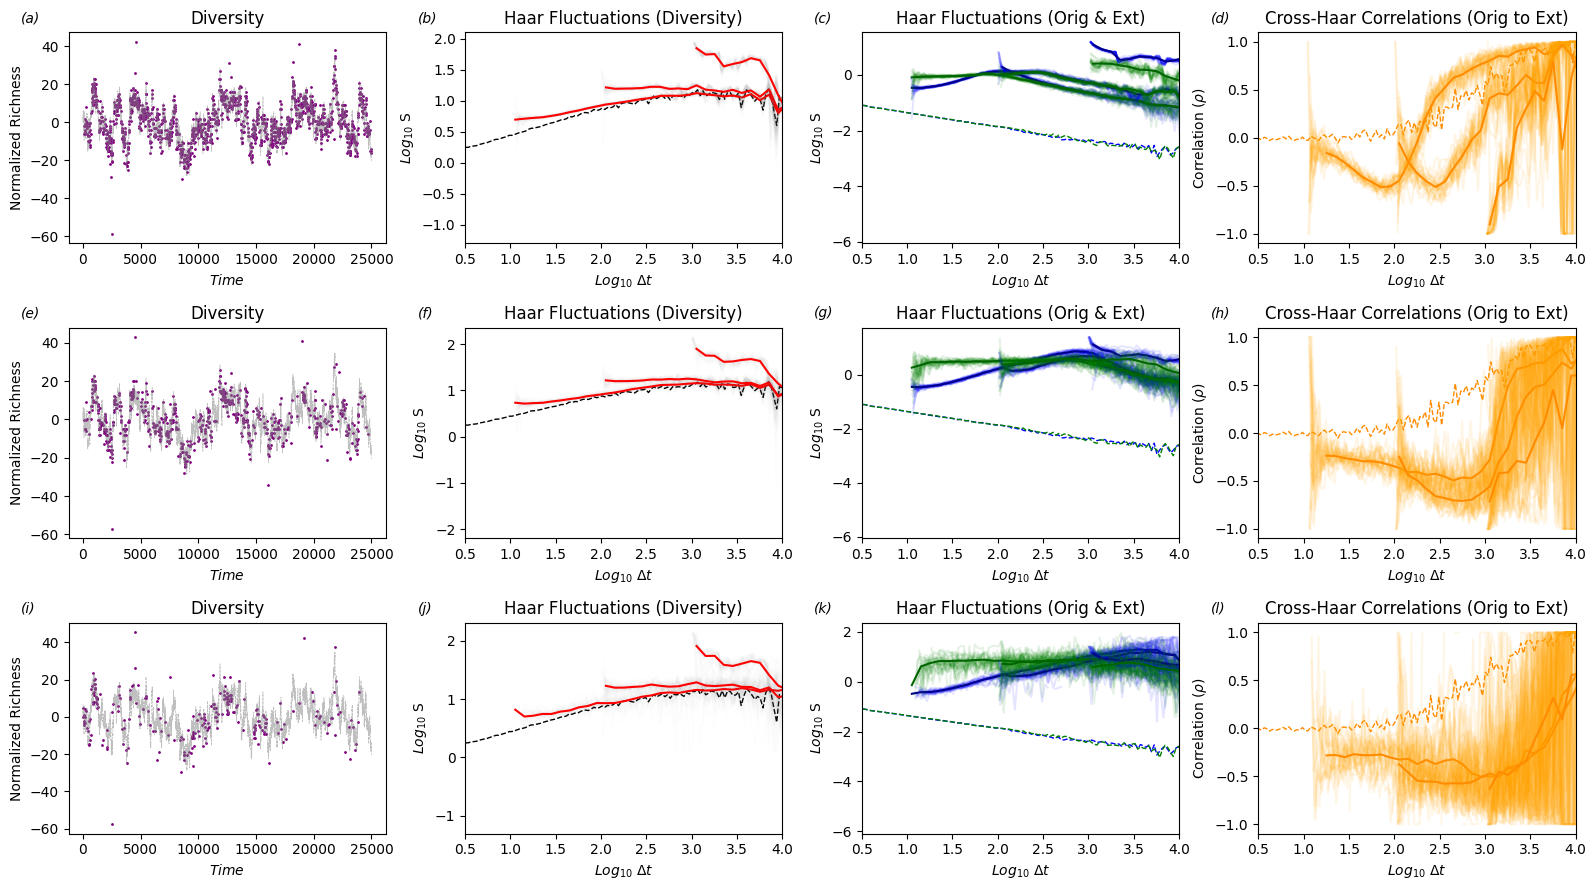

In [16]:
# Plot
fig, axs = plt.subplots(3, 4,  figsize=(16, 9))

group_untb = [UNTB_C100, UNTB_C1000, UNTB_C10000]

for g, grouping in enumerate(group_untb):
    row_idx = g

    # Plot Ideals
    x = haar_Div_ideal[:,0]
    axs[g,0].plot(range(len(divRT_ideal[0:25000])), divRT_ideal[0:25000] - np.mean(divRT_ideal[0:25000]), c = "grey", linestyle = "dashed",alpha = 0.5, linewidth = 0.5)
    axs[g,1].plot(np.log10(x), np.log10(haar_Div_ideal[:,1]), c = "black", linestyle = "dashed",alpha = 1, linewidth = 1)
    axs[g,2].plot(np.log10(x), np.log10(haar_oriRT_ideal[:,1]), c = "blue", linestyle = "dashed",alpha = 1, linewidth = 1)
    axs[g,2].plot(np.log10(x), np.log10(haar_extRT_ideal[:,1]), c = "green", linestyle = "dashed",alpha = 1, linewidth = 1)
    axs[g,3].plot(np.log10(x), (corr_org_ext_ideal), c = "darkorange", linestyle = "dashed",alpha = 1, linewidth = 1)


    for data in grouping:

        # Diversity
        #for i in range(len(data)):
        for i in range(1):
            x = data[i]["time_an"]
            y = data[i]["divRT"]
            axs[row_idx,0].scatter(x , y - np.mean(y), c = "purple", alpha = 1, s = 1)


        # Haar Diversity
        harr_list = []
        time_list = []
        for i in range(len(data)):
            x = data[i]["haar_Div"][:,0]
            y = data[i]["haar_Div"][:,1]
            time_list.append(x)
            harr_list.append(y)
            axs[row_idx,1].plot(np.log10(x), np.log10(y), c = "grey", alpha = 0.01)

        haar_div_mean, haar_div_std, haarDiv_mean_time = analysisFunctions.mean_std_uneven(
            harr_list, time_list, bin_edges=10**np.arange(0.1, 4.5, 0.1))
        axs[row_idx,1].plot(np.log10(haarDiv_mean_time), np.log10(haar_div_mean), c = "red", alpha = 1)

        # Haar Origination
        harr_list = []
        time_list = []
        for i in range(len(data)):
            x = data[i]["haar_oriRT"][:,0]
            y = data[i]["haar_oriRT"][:,1]
            time_list.append(x)
            harr_list.append(y)
            axs[row_idx,2].plot(np.log10(x), np.log10(y), c = "blue", alpha = 0.1)

        haar_div_mean, haar_div_std, haarDiv_mean_time = analysisFunctions.mean_std_uneven(
            harr_list, time_list, bin_edges=10**np.arange(0.1, 4.5, 0.1))
        axs[row_idx,2].plot(np.log10(haarDiv_mean_time), np.log10(haar_div_mean), c = "darkblue", alpha = 1)

        # Haar Extinction (plotted on same as Origination?)
        harr_list = []
        time_list = []
        for i in range(len(data)):
            x = data[i]["haar_extRT"][:,0]
            y = data[i]["haar_extRT"][:,1]
            time_list.append(x)
            harr_list.append(y)
            axs[row_idx,2].plot(np.log10(x), np.log10(y), c = "green", alpha = 0.1)

        haar_div_mean, haar_div_std, haarDiv_mean_time = analysisFunctions.mean_std_uneven(
            harr_list, time_list, bin_edges=10**np.arange(0.1, 4.5, 0.1))
        axs[row_idx,2].plot(np.log10(haarDiv_mean_time), np.log10(haar_div_mean), c = "darkgreen", alpha = 1)

        # Correlations
        harr_list = []
        time_list = []
        for i in range(len(data)):
            x = data[i]["haar_extRT"][:,0]
            y = data[i]["corr_org_ext"]
            time_list.append(x)
            harr_list.append(y)
            axs[row_idx,3].plot(np.log10(x), y, c = "orange", alpha = 0.1)

        haar_div_mean, haar_div_std, haarDiv_mean_time = analysisFunctions.mean_std_uneven(
            harr_list, time_list, bin_edges=10**np.arange(1.2, 4.5, 0.1))
        axs[row_idx,3].plot(np.log10(haarDiv_mean_time), haar_div_mean, c = "darkorange", alpha = 1)

    # Optional: Add titles or labels
    axs[row_idx,0].set_title("Diversity")
    axs[row_idx,1].set_title("Haar Fluctuations (Diversity)")
    axs[row_idx,2].set_title("Haar Fluctuations (Orig & Ext)")
    axs[row_idx,3].set_title("Cross-Haar Correlations (Orig to Ext)")

    axs[row_idx,0].set_xlabel(r'$Time$')
    axs[row_idx,0].set_ylabel(r'Normalized Richness')
    axs[row_idx,1].set_xlabel(r'$Log_{10}$ $\Delta t$')
    axs[row_idx,1].set_ylabel(r'$Log_{10}$ S')
    axs[row_idx,2].set_xlabel(r'$Log_{10}$ $\Delta t$')
    axs[row_idx,2].set_ylabel(r'$Log_{10}$ S')
    axs[row_idx,3].set_xlabel(r'$Log_{10}$ $\Delta t$')
    axs[row_idx,3].set_ylabel(r'Correlation $(\rho)$')

    axs[row_idx,1].set_xlim(0.5, 4)
    axs[row_idx,2].set_xlim(0.5, 4)
    axs[row_idx,3].set_xlim(0.5, 4)


subplot_letters = [
"(a)", "(b)","(c)", "(d)",
"(e)", "(f)","(g)", "(h)",
"(i)", "(j)","(k)", "(l)"
]
# Plot Letters
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        idx = i * 4 + j
        ax.text(-0.15, 1.1, subplot_letters[idx], transform=ax.transAxes,
            fontsize=10, fontstyle='italic', va='top', ha='left')



plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.4)
plt.savefig(tiff_save_path, format='tiff', dpi=300, bbox_inches='tight',transparent=True)

## Supplementary Plots

### Diversity Dynamics between Neutral and Species-Level Model

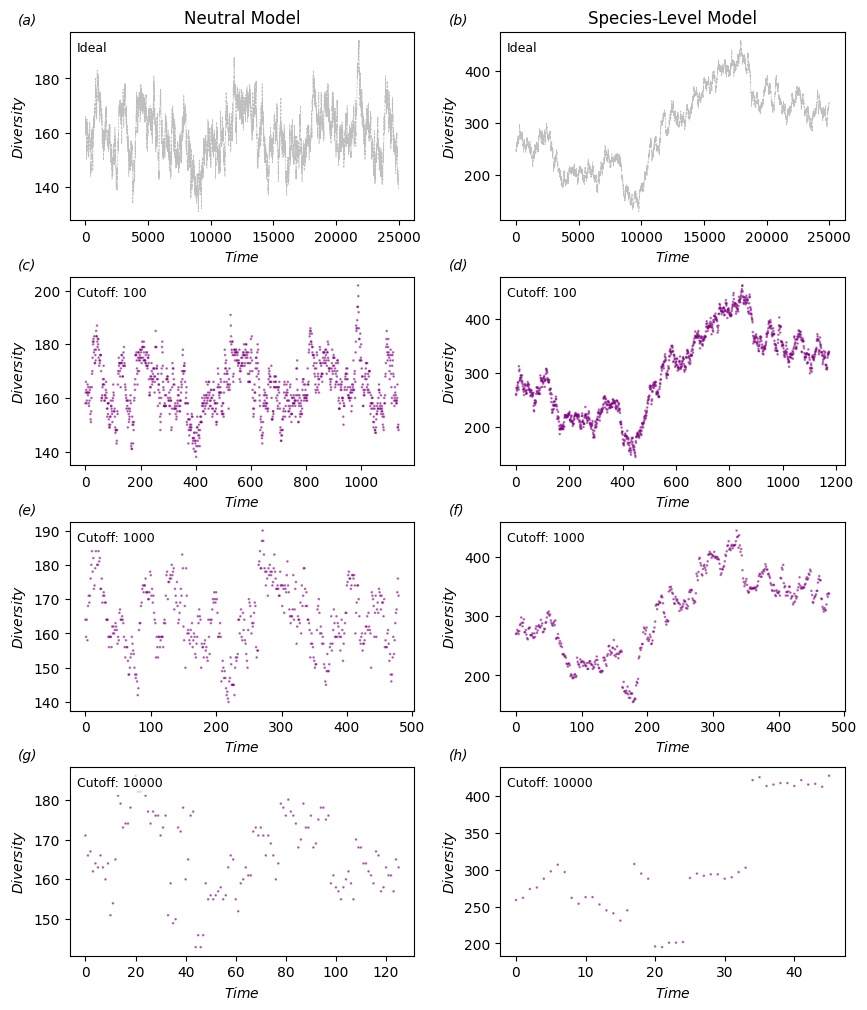

In [ ]:
# Plot comparing neutral and species-level models for unbiased and biased case
fig, axs = plt.subplots(4,2, figsize = (10, 12))

# Legend labels for each row
row_labels = ["Ideal", "Cutoff: 100", "Cutoff: 1000", "Cutoff: 10000"]

# Left column will be Neutral model 
axs[0,0].plot(range(len(divRT_ideal[0:25000])), divRT_ideal[0:25000], c = "grey", linestyle = "dashed",alpha = 0.5, linewidth = 0.5)
axs[1,0].scatter(range(len(group_untb[0][0][0]["divRT"])), group_untb[0][0][0]["divRT"], c = "purple", linestyle = "dashed", alpha = 0.5, s = 0.75)
axs[2,0].scatter(range(len(group_untb[1][0][0]["divRT"])), group_untb[1][0][0]["divRT"], c = "purple", linestyle = "dashed", alpha = 0.5, s = 0.75)
axs[3,0].scatter(range(len(group_untb[2][0][0]["divRT"])), group_untb[2][0][0]["divRT"], c = "purple", linestyle = "dashed", alpha = 0.5, s = 0.75)

# Right column will be Species-Level model 
axs[0,1].plot(range(len(divRT_ideal_rw[0:25000])), divRT_ideal_rw[0:25000], c = "grey", linestyle = "dashed",alpha = 0.5, linewidth = 0.5)
axs[1,1].scatter(range(len(group_rw[0][0][0]["divRT"])), group_rw[0][0][0]["divRT"], c = "purple", linestyle = "dashed", alpha = 0.5, s = 0.75)
axs[2,1].scatter(range(len(group_rw[1][0][0]["divRT"])), group_rw[1][0][0]["divRT"], c = "purple", linestyle = "dashed", alpha = 0.5, s = 0.75)
axs[3,1].scatter(range(len(group_rw[2][0][0]["divRT"])), group_rw[2][0][0]["divRT"], c = "purple", linestyle = "dashed", alpha = 0.5, s = 0.75)

# Titles or labels
axs[0,0].set_title("Neutral Model")
axs[0,1].set_title("Species-Level Model")

for i in range(2):
    for j in range(4):
        axs[j,i].set_xlabel(r'$Time$')
        axs[j,i].set_ylabel(r'$Diversity$')
        axs[j, i].text(0.02, 0.95, row_labels[j], transform=axs[j, i].transAxes,
                       fontsize=9, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

subplot_letters = [
"(a)", "(b)","(c)", "(d)",
"(e)", "(f)","(g)", "(h)"
]
# Plot Letters
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        idx = i * 2 + j
        ax.text(-0.15, 1.1, subplot_letters[idx], transform=ax.transAxes,
            fontsize=10, fontstyle='italic', va='top', ha='left')


plt.subplots_adjust(wspace=0.25, hspace=0.3)

save_path = "../Figures/Supplementary Figures/supplementary_f1.png"
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight',transparent=False)

### Comparison of Origination and Extinction Distributions


=== Turn Summary Statistics (Species-Level) ===
Dataset  Mean  Std Dev
   C100   0.0    0.072
  C1000  -0.0    0.247
 C10000   0.0    0.614

=== Turn Summary Statistics (Neutral) ===
Dataset   Mean  Std Dev
   C100 -0.000    0.131
  C1000  0.010    0.845
 C10000 -0.001    1.686

=== Origination Summary Statistics (Species-Level) ===
Dataset  Mean  Std Dev
   C100 0.058    0.048
  C1000 0.100    0.162
 C10000 0.170    0.404

=== Origination Summary Statistics (Neutral) ===
Dataset  Mean  Std Dev
   C100 0.100    0.096
  C1000 0.235    0.562
 C10000 0.393    1.139

=== Extinction Summary Statistics (Species-Level) ===
Dataset  Mean  Std Dev
   C100 0.058    0.048
  C1000 0.100    0.162
 C10000 0.171    0.410

=== Extinction Summary Statistics (Neutral) ===
Dataset  Mean  Std Dev
   C100 0.100    0.097
  C1000 0.245    0.605
 C10000 0.392    1.138


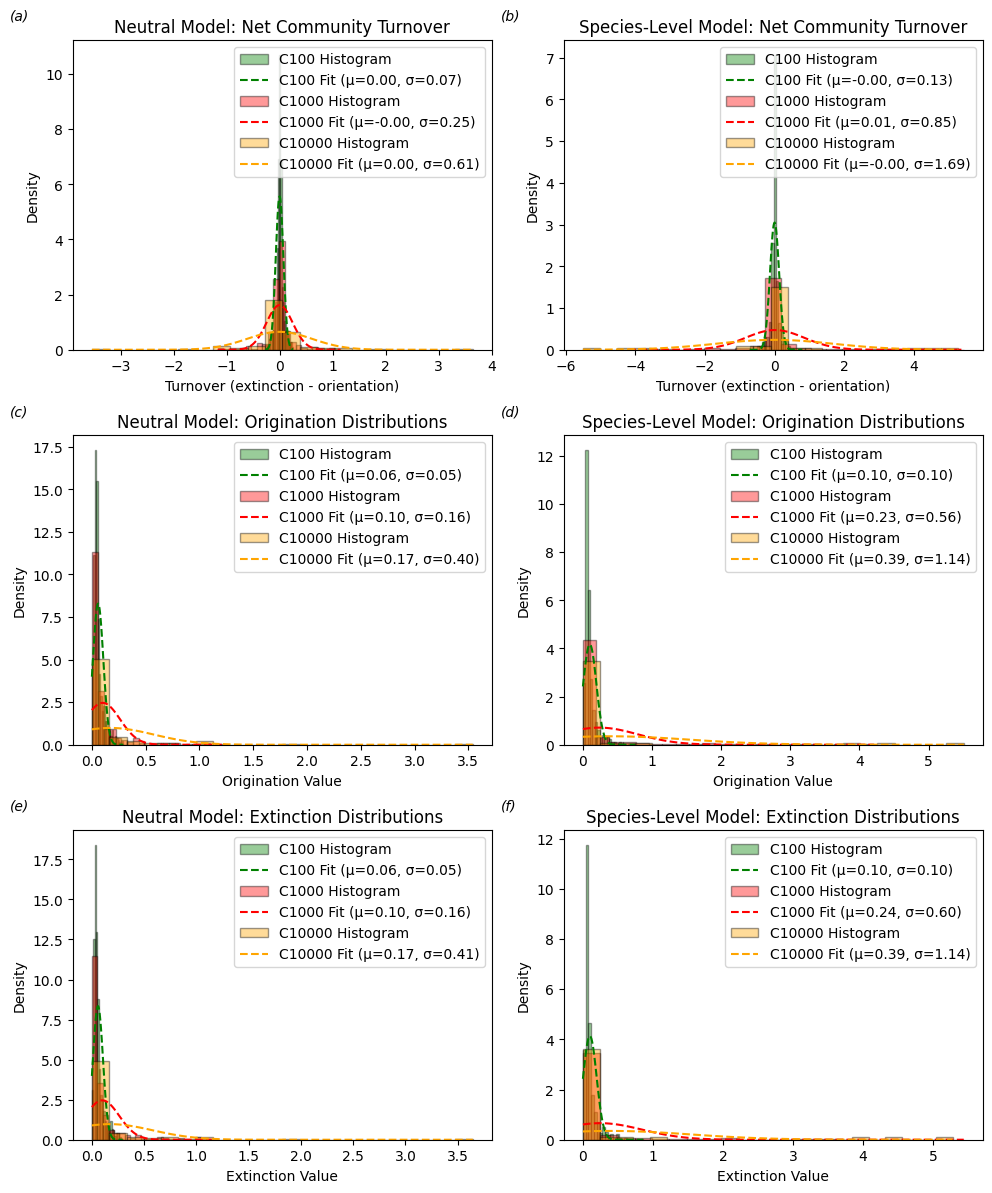

In [ ]:
# Plot of turnover, origination, and extinction distributions 
# Labels and datasets
colors = ['green', 'red', 'orange']
labels = ['C100', 'C1000', 'C10000']
datasets = [
    # Column 1 Neutral
    (group_untb[0][0][0]["ext2f3"], group_untb[0][0][0]["org2f3"]),
    (group_untb[1][0][0]["ext2f3"], group_untb[1][0][0]["org2f3"]),
    (group_untb[2][0][0]["ext2f3"], group_untb[2][0][0]["org2f3"]),
    # Column 2 Species-Level
    (group_rw[0][0][0]["ext2f3"], group_rw[0][0][0]["org2f3"]),
    (group_rw[1][0][0]["ext2f3"], group_rw[1][0][0]["org2f3"]),
    (group_rw[2][0][0]["ext2f3"], group_rw[2][0][0]["org2f3"])
]

def plot_and_summarize(ax, data_list, labels, colors, title, xlabel):
    """Plot distributions on a given axis and return stats table."""
    stats = []

    for data, color, label in zip(data_list, colors, labels):
        clean_data = data[~np.isnan(data)]
        mean = np.nanmean(clean_data)
        std = np.nanstd(clean_data)

        # Fit normal distribution
        mu, sigma = scipy.stats.norm.fit(clean_data)
        x = np.linspace(min(clean_data), max(clean_data), 100)
        pdf = scipy.stats.norm.pdf(x, mu, sigma)

        # Plot histogram
        ax.hist(clean_data, bins=22, alpha=0.4, color=color, edgecolor='black', density=True,
                label=f'{label} Histogram')

        # Plot PDF
        ax.plot(x, pdf, color=color, linestyle='--', label=f'{label} Fit (μ={mu:.2f}, σ={sigma:.2f})')

        # Save stats
        stats.append({'Dataset': label, 'Mean': round(mean, 3), 'Std Dev': round(std, 3)})

    # Final axis setup
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Density')
    ax.legend()

    return pd.DataFrame(stats)


# === CREATE 3-row, 2-column figure ===
fig, axs = plt.subplots(3, 2, figsize=(10, 12))  # 3 rows, 2 columns
titles = ['Neutral Model', 'Species-Level Model']  # Column titles

# Split datasets into two sets: species-level and neutral
datasets_rw = datasets[:3]
datasets_untb = datasets[3:]

# 1. COM_TURN = EXIT - ORI
com_turn_data_rw = [exit - ori for exit, ori in datasets_rw]
com_turn_data_untb = [exit - ori for exit, ori in datasets_untb]

df_turn_rw = plot_and_summarize(axs[0, 0], com_turn_data_rw, labels, colors,
                                title=f'{titles[0]}: Net Community Turnover',
                                xlabel='Turnover (extinction - orientation)')
df_turn_untb = plot_and_summarize(axs[0, 1], com_turn_data_untb, labels, colors,
                                  title=f'{titles[1]}: Net Community Turnover',
                                  xlabel='Turnover (extinction - orientation)')

print("\n=== Turn Summary Statistics (Species-Level) ===")
print(df_turn_rw.to_string(index=False))
print("\n=== Turn Summary Statistics (Neutral) ===")
print(df_turn_untb.to_string(index=False))

# 2. ORIENTATION VALUES
ori_data_rw = [ori for _, ori in datasets_rw]
ori_data_untb = [ori for _, ori in datasets_untb]

df_ori_rw = plot_and_summarize(axs[1, 0], ori_data_rw, labels, colors,
                               title=f'{titles[0]}: Origination Distributions',
                               xlabel='Origination Value')
df_ori_untb = plot_and_summarize(axs[1, 1], ori_data_untb, labels, colors,
                                 title=f'{titles[1]}: Origination Distributions',
                                 xlabel='Origination Value')

print("\n=== Origination Summary Statistics (Species-Level) ===")
print(df_ori_rw.to_string(index=False))
print("\n=== Origination Summary Statistics (Neutral) ===")
print(df_ori_untb.to_string(index=False))

# 3. EXT VALUES
exit_data_rw = [exit for exit, _ in datasets_rw]
exit_data_untb = [exit for exit, _ in datasets_untb]

df_exit_rw = plot_and_summarize(axs[2, 0], exit_data_rw, labels, colors,
                                title=f'{titles[0]}: Extinction Distributions',
                                xlabel='Extinction Value')
df_exit_untb = plot_and_summarize(axs[2, 1], exit_data_untb, labels, colors,
                                  title=f'{titles[1]}: Extinction Distributions',
                                  xlabel='Extinction Value')

print("\n=== Extinction Summary Statistics (Species-Level) ===")
print(df_exit_rw.to_string(index=False))
print("\n=== Extinction Summary Statistics (Neutral) ===")
print(df_exit_untb.to_string(index=False))

subplot_letters = [
"(a)", "(b)","(c)", "(d)",
"(e)", "(f)","(g)", "(h)"
]
# Plot Letters
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        idx = i * 2 + j
        ax.text(-0.15, 1.1, subplot_letters[idx], transform=ax.transAxes,
            fontsize=10, fontstyle='italic', va='top', ha='left')


# Final layout adjustments
plt.tight_layout()

save_path = "./Figures/Supplementary Figures/supplementary_f2.png"
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight',transparent=False)

### Mean Convergence Time

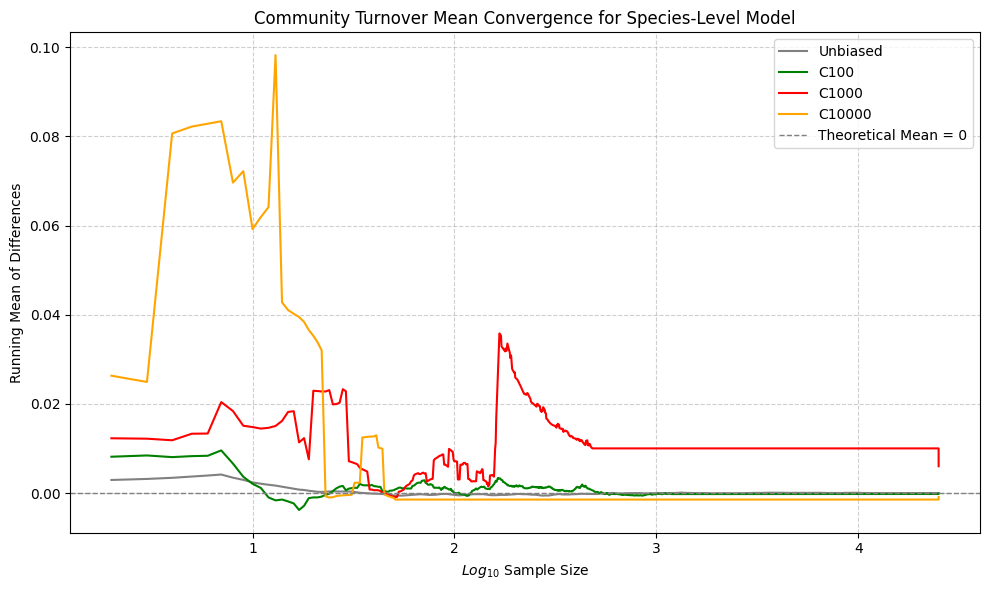

In [ ]:
# Species-level plot of mean convergence

colors = ['grey','green', 'red', 'orange']
labels = ['Unbiased','C100', 'C1000', 'C10000']

datasets = [
    ext2f3_ideal_rw - org2f3_ideal_rw,
    group_rw[0][0][0]["ext2f3"] - group_rw[0][0][0]["org2f3"],
    group_rw[1][0][0]["ext2f3"] - group_rw[1][0][0]["org2f3"],
    group_rw[2][0][0]["ext2f3"] - group_rw[2][0][0]["org2f3"]
]

t = datasets[0].shape[0]

running_means = []

for data in datasets:
    means = [np.nanmean(data[:i]) for i in range(2, t)]
    running_means.append(means)

samples = np.arange(2, t)

plt.figure(figsize=(10, 6))

for i, means in enumerate(running_means):
    y1 = np.convolve(means, np.ones(10)/10, mode='same')
    plt.plot(np.log10(samples), y1, label=labels[i], color=colors[i])

plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Theoretical Mean = 0')
plt.xlabel(r'$Log_{10}$ Sample Size')
plt.ylabel('Running Mean of Differences')
plt.title('Community Turnover Mean Convergence for Species-Level Model')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

save_path = "./Figures/Supplementary Figures/supplementary_f3.png"
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight',transparent=False)

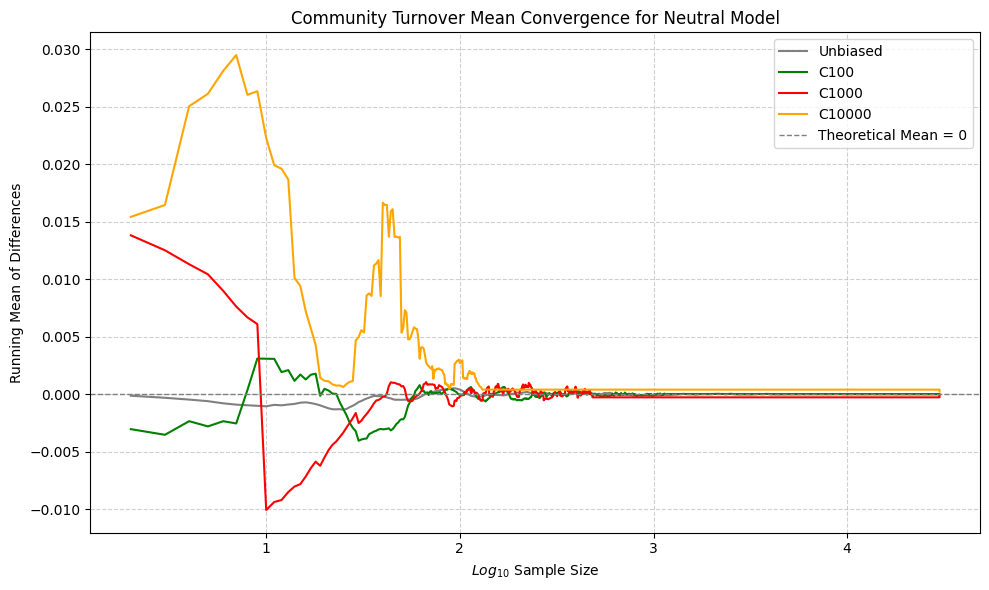

In [ ]:
# Neutral plot of mean convergence

colors = ['grey','green', 'red', 'orange']
labels = ['Unbiased','C100', 'C1000', 'C10000']

datasets = [
    ext2f3_ideal - org2f3_ideal,
    group_untb[0][0][0]["ext2f3"] - group_untb[0][0][0]["org2f3"],
    group_untb[1][0][0]["ext2f3"] - group_untb[1][0][0]["org2f3"],
    group_untb[2][0][0]["ext2f3"] - group_untb[2][0][0]["org2f3"]
]

t = datasets[0].shape[0]

running_means = []

for data in datasets:
    means = [np.nanmean(data[:i]) for i in range(2, t)]
    running_means.append(means)

samples = np.arange(2, t)

plt.figure(figsize=(10, 6))

for i, means in enumerate(running_means):
    y1 = np.convolve(means, np.ones(10)/10, mode='same')
    plt.plot(np.log10(samples), y1, label=labels[i], color=colors[i])

plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Theoretical Mean = 0')
plt.xlabel(r'$Log_{10}$ Sample Size')
plt.ylabel('Running Mean of Differences')
plt.title('Community Turnover Mean Convergence for Neutral Model')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

save_path = "./Figures/Supplementary Figures/supplementary_f4.png"
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight',transparent=False)